Tutorial
=====

Using the Image Class
------------------------

The most important class in the Python Imaging Library is the Image class, 
defined in the module with the same name. 
You can create instances of this class in several ways; either by loading 
images from files, processing other images, or creating images from scratch.

To load an image from a file, use the `open` function in the `Image` module.

In [1]:
from PIL import Image
im = Image.open("images/lena.ppm")

If successful, this function returns an `Image` object. 
You can now use instance attributes to examine the file contents.

In [2]:
print(im.format, im.size, im.mode)

PPM (512, 512) RGB


The format attribute identifies the source of an image. 
If the image was not read from a file, it is set to `None`. 
The size attribute is a 2-tuple containing width and height (in pixels). 
The mode attribute defines the number and names of the bands in the image, 
and also the pixel type and depth. 
Common modes are `"L"` (luminance) for greyscale images, `"RGB"` for true colour images, 
and `"CMYK"` for pre-press images.

If the file cannot be opened, an `IOError` exception is raised.

Once you have an instance of the `Image` class, you can use the methods defined by this class
to process and manipulate the image. 
Let’s display the image we just loaded:

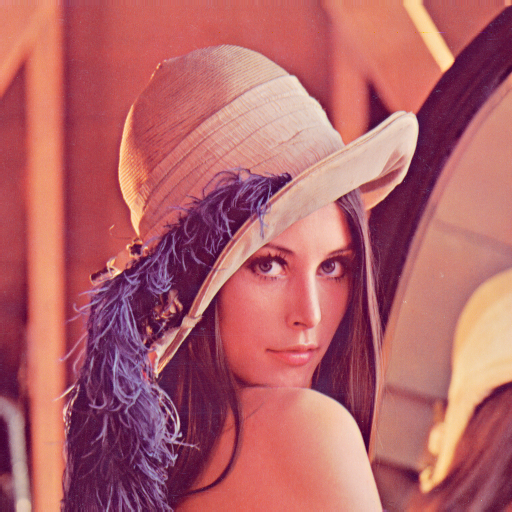

In [3]:
im

The following sections provide an overview of the different functions provided in this library.

Reading and Writing Images
-------------------------------


The Python Imaging Library supports a wide variety of image file formats. 
To read files from disk, use the [open] function in the `Image` module. 
You don’t have to know the file format to open a file. 
The library automatically determines the format based on the contents of the file.

To save a file, use the [save] method of the `Image` class. 
When saving files, the name becomes important. 
Unless you specify the format, the library uses the filename extension to discover which file storage format to use.

[open]: http://effbot.org/imagingbook/image.htm#image-open-function
[save]: http://effbot.org/imagingbook/image.htm#image-save-method

#### Convert files to JPEG

In [4]:
import os
from PIL import Image

args = ["images/lena.ppm"]

for infile in args:
    f, e = os.path.splitext(infile)
    outfile = f + ".jpg"
    if infile != outfile:
        try:
            Image.open(infile).save(outfile)
        except IOError:
            print("cannot convert", infile)

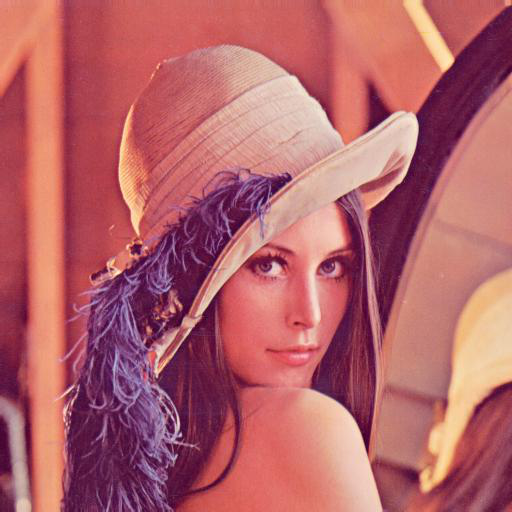

In [5]:
Image.open("images/lena.jpg")

A second argument can be supplied to the save method which explicitly specifies a file format. 
If you use a non-standard extension, you must always specify the format this way:

#### Create JPEG Thumbnails

In [6]:
import os
from PIL import Image

size = 128, 128

args = ["images/lena.ppm"]

for infile in args:
    outfile = os.path.splitext(infile)[0] + ".thumbnail"
    if infile != outfile:
        try:
            im = Image.open(infile)
            im.thumbnail(size)
            im.save(outfile, "JPEG")
        except IOError:
            print("cannot create thumbnail for", infile)

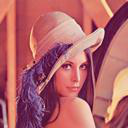

In [7]:
Image.open("images/lena.thumbnail")

It is important to note that the library doesn’t decode or load the raster data unless it really has to. When you open a file, the file header is read to determine the file format and extract things like mode, size, and other properties required to decode the file, but the rest of the file is not processed until later.

This means that opening an image file is a fast operation, which is independent of the file size and compression type. Here’s a simple script to quickly identify a set of image files:

**Identify Image Files**

In [8]:
from PIL import Image

args = ["images/lena.ppm"]

for infile in args:
    try:
        im = Image.open(infile)
        print(infile, im.format, "%dx%d" % im.size, im.mode)
    except IOError:
        pass

images/lena.ppm PPM 512x512 RGB


Cutting, Pasting and Merging Images
----------------------------------------

The `Image` class contains methods allowing you to manipulate regions within an image. 
To extract a sub-rectangle from an image, use the [crop] method.

[crop]: http://effbot.org/imagingbook/image.htm#image-crop-method

#### Copying a subrectangle from an image

In [9]:
box = (100, 100, 400, 400)
region = im.crop(box)

The region is defined by a 4-tuple, where coordinates are `(left, upper, right, lower)`. 
The Python Imaging Library uses a coordinate system with `(0, 0)` in the upper left corner. 
Also note that coordinates refer to positions between the pixels, 
so the region in the above example is exactly `300x300` pixels.

The region could now be processed in a certain manner and pasted back.

#### Processing a subrectangle, and pasting it back

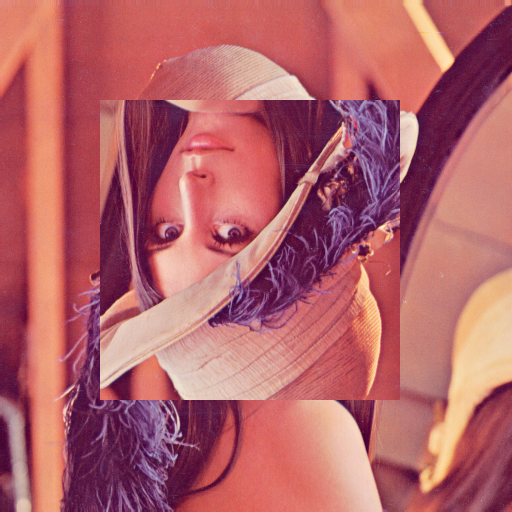

In [10]:
region = region.transpose(Image.ROTATE_180)
im.paste(region, box)
display(im)

When pasting regions back, the size of the region must match the given region exactly. In addition, the region cannot extend outside the image. However, the modes of the original image and the region do not need to match. If they don’t, the region is automatically converted before being pasted (see the section on Colour Transforms below for details).

Here’s an additional example:

#### Rolling an image

In [11]:
def roll(image, delta):
    "Roll an image sideways"

    xsize, ysize = image.size

    delta = delta % xsize
    if delta == 0: return image

    part1 = image.crop((0, 0, delta, ysize))
    part2 = image.crop((delta, 0, xsize, ysize))
    image.paste(part2, (0, 0, xsize-delta, ysize))
    image.paste(part1, (xsize-delta, 0, xsize, ysize))

    return image

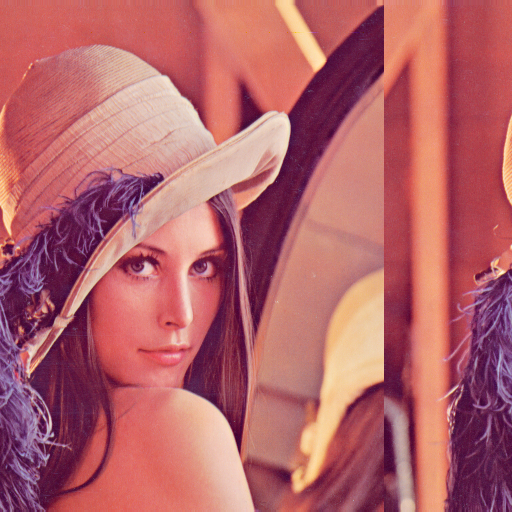

In [12]:
im = Image.open("images/lena.ppm")
roll(im, 128)

For more advanced tricks, the paste method can also take a transparency mask as an optional argument. 
In this mask, the value `255` indicates that the pasted image is opaque in that position 
(that is, the pasted image should be used as is). 
The value `0` means that the pasted image is completely transparent. 
Values in-between indicate different levels of transparency.

The Python Imaging Library also allows you to work with the individual bands of an multi-band image, 
such as an RGB image. 
The split method creates a set of new images, each containing one band from the original multi-band image. 
The merge function takes a mode and a tuple of images, and combines them into a new image. 
The following sample swaps the three bands of an RGB image:

#### Splitting and merging bands

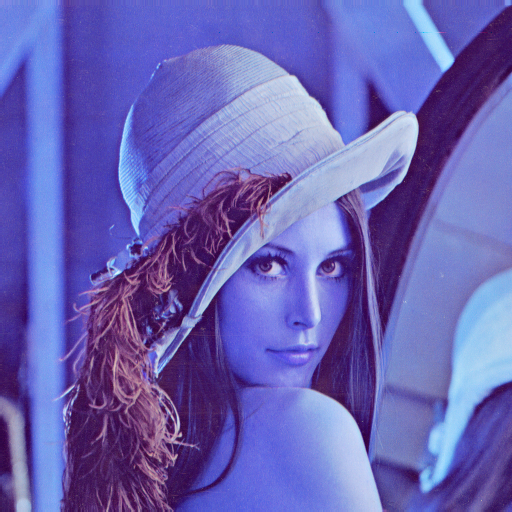

In [13]:
im = Image.open("images/lena.ppm")
r, g, b = im.split()
im = Image.merge("RGB", (b, g, r))
im

Note that for a single-band image, split returns the image itself. 
To work with individual colour bands, you may want to convert the image to `"RGB"` first.

Geometrical Transforms
============

The `Image` class contains methods to resize and rotate an image. 
The former takes a tuple giving the new size, the latter the angle in degrees counter-clockwise.

#### Simple geometry transforms

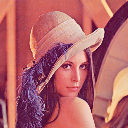

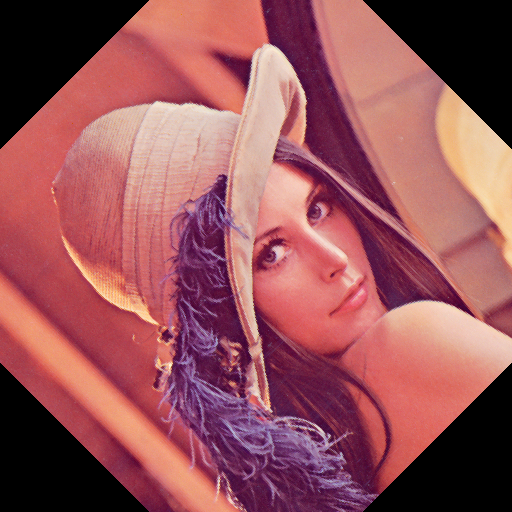

In [14]:
im = Image.open("images/lena.ppm")
display(im.resize((128, 128)))
display(im.rotate(45)) # degrees counter-clockwise


To rotate the image in `90` degree steps, you can either use the `rotate` method or the `transpose` method. 
The latter can also be used to flip an image around its horizontal or vertical axis.

#### Transposing an image

In [15]:
from ipywidgets import interact, Select
select = Select(options=["FLIP_LEFT_RIGHT", "FLIP_TOP_BOTTOM", "ROTATE_90", "ROTATE_180", "ROTATE_270"])

@interact(mode=select)
def transpose(mode):
    return im.transpose(getattr(Image, mode))


interactive(children=(Select(description='mode', options=('FLIP_LEFT_RIGHT', 'FLIP_TOP_BOTTOM', 'ROTATE_90', 'ROTATE_180', 'ROTATE_270'), value='FLIP_LEFT_RIGHT'), Output()), _dom_classes=('widget-interact',))

There’s no difference in performance or result between `transpose(ROTATE)` and corresponding `rotate` operations.

A more general form of image transformations can be carried out via the [transform] method. 
See the reference section for details.

[transform]: http://effbot.org/imagingbook/image.htm#image-transform-method

Colour Transforms
--------------------

The Python Imaging Library allows you to convert images between different pixel representations using the `convert` function.

#### Converting between modes

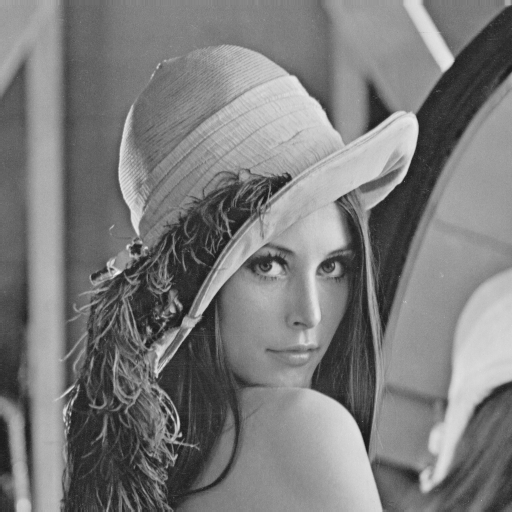

In [16]:
Image.open("images/lena.ppm").convert("L")

The library supports transformations between each supported mode and the `"L"` and `"RGB"` modes. 
To convert between other modes, you may have to use an intermediate image (typically an `"RGB"` image).

Image Enhancement
-------------------

The Python Imaging Library provides a number of methods and modules that can be used to enhance images.

### Filters

The [`ImageFilter`][ImageFilter] module contains a number of pre-defined enhancement filters that can be used with the filter method.

[ImageFilter]: http://effbot.org/imagingbook/imagefilter.htm

#### Applying filters

In [17]:
from ipywidgets import interact, Select
select = Select(options=["BLUR", "CONTOUR", "DETAIL", 
                        "EDGE_ENHANCE", "EDGE_ENHANCE_MORE",  
                        "EMBOSS", "FIND_EDGES", "SMOOTH", 
                        "SMOOTH_MORE", "SHARPEN"])

from PIL import ImageFilter

@interact(filter=select)
def display_filter(filter):
  return im.filter(getattr(ImageFilter, filter))

interactive(children=(Select(description='filter', options=('BLUR', 'CONTOUR', 'DETAIL', 'EDGE_ENHANCE', 'EDGE_ENHANCE_MORE', 'EMBOSS', 'FIND_EDGES', 'SMOOTH', 'SMOOTH_MORE', 'SHARPEN'), value='BLUR'), Output()), _dom_classes=('widget-interact',))

Point Operations
------------------

The `point` method can be used to translate the pixel values of an image (e.g. image contrast manipulation). In most cases, a function object expecting one argument can be passed to the this method. Each pixel is processed according to that function:

#### Applying point transforms

In [18]:
from ipywidgets import FloatSlider, interact
slider = FloatSlider(min=0.0, max=2.0, value=1.0)

@interact(gain=slider)
def point_transform(gain):
  return im.point(lambda i: i * gain)

interactive(children=(FloatSlider(value=1.0, description='gain', max=2.0), Output()), _dom_classes=('widget-interact',))

Using the above technique, you can quickly apply any simple expression to an image. 
You can also combine the `point` and `paste` methods to selectively modify an image:
 
#### Processing individual bands

In [40]:
from ipywidgets import IntSlider, interact
slider = IntSlider(min=0, max=256, value=128, continuous_update=True)

import matplotlib.pyplot as mpl
%matplotlib inline

@interact(threshold=slider)
def process(threshold):
    # split the image into individual bands
    R, G, B = 0, 1, 2
    source = im.split()
    
    # select regions where red is greater than threshold
    mask = source[R].point(lambda i: i >= threshold and 255)

    # zero out the green and blue and band
    out_G = source[G].point(lambda i: 0)
    out_B = source[B].point(lambda i: 0)
    
    # paste the processed band back (keep only the red content), 
    # but only where red was >= threshold
    source[G].paste(out_G, None, mask)
    source[B].paste(out_B, None, mask)
    
    # build a new multiband image
    return Image.merge(im.mode, source)

interactive(children=(IntSlider(value=128, description='threshold', max=256), Output()), _dom_classes=('widget-interact',))

Note the syntax used to create the mask:

    imout = im.point(lambda i: expression and 255)

Python only evaluates the portion of a logical expression as is necessary to determine the outcome, and returns the last value examined as the result of the expression. 
So if the expression above is false (`0`), 
Python does not look at the second operand, and thus returns `0`. 
Otherwise, it returns `255`.

Enhancement
-------------

For more advanced image enhancement, you can use the classes in the [`ImageEnhance`][ImageEnhance] module. 
Once created from an image, an enhancement object can be used to quickly try out different settings.

[ImageEnhance]: http://effbot.org/imagingbook/imageenhance.htm

You can adjust contrast, brightness, colour balance and sharpness in this way.

#### Enhancing images



In [20]:
from PIL import ImageEnhance
from ipywidgets import FloatSlider, interact
slider = FloatSlider(min=0.0, max=2.0, value=1.0)

@interact(contrast=slider)
def enhance(contrast):
  enh = ImageEnhance.Contrast(im)
  return enh.enhance(contrast)

interactive(children=(FloatSlider(value=1.0, description='contrast', max=2.0), Output()), _dom_classes=('widget-interact',))

Image Sequences
-----------------

The Python Imaging Library contains some basic support for image sequences (also called *animation* formats). 
Supported sequence formats include FLI/FLC, GIF, and a few experimental formats. 
TIFF files can also contain more than one frame.

In [21]:
from IPython.display import HTML
HTML('<img src="images/bart.gif">')

When you open a sequence file, PIL automatically loads the first frame in the sequence. 
You can use the [seek] and [tell] methods to move between different frames:

[seek]: http://effbot.org/imagingbook/image.htm#image-seek-method
[tell]: http://effbot.org/imagingbook/image.htm#image-tell-method

#### Reading sequences

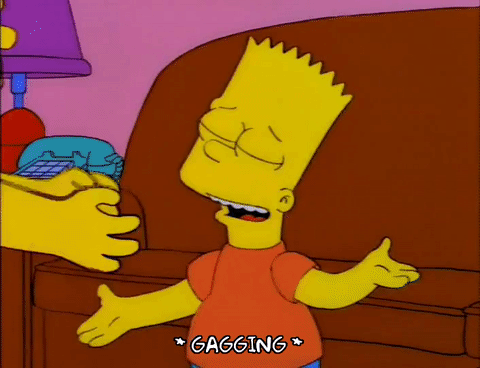

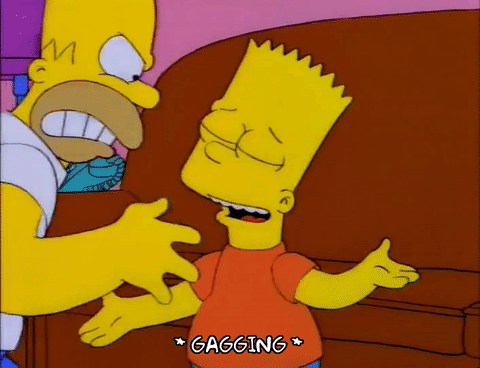

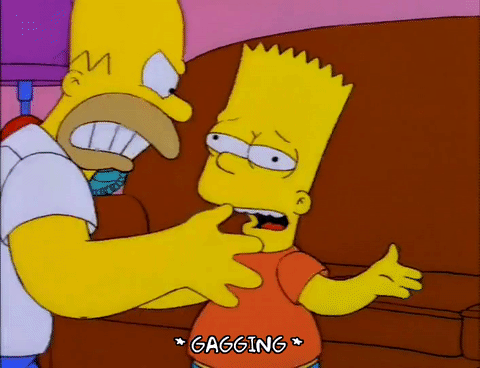

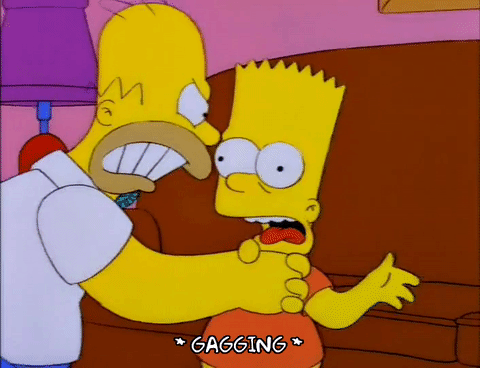

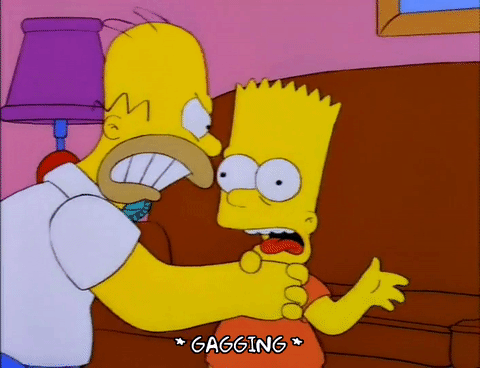

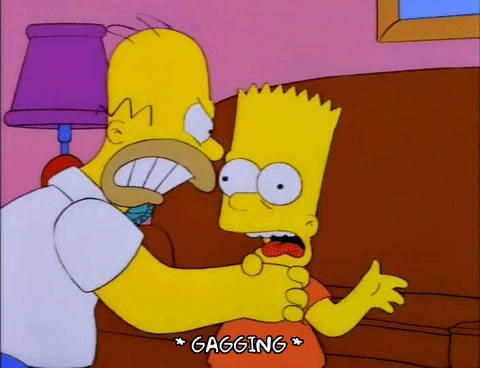

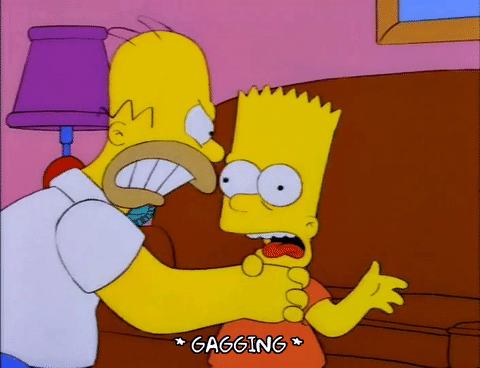

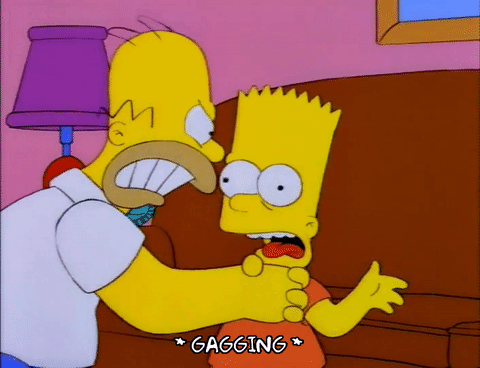

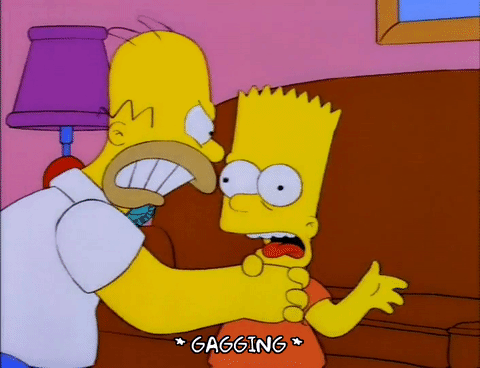

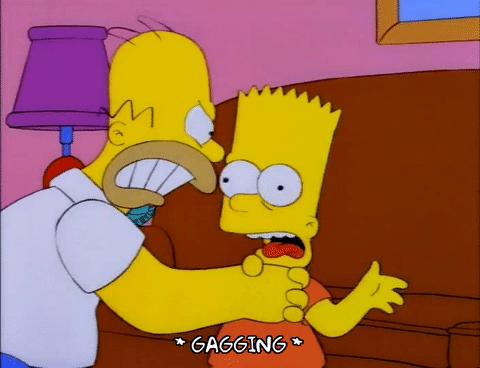

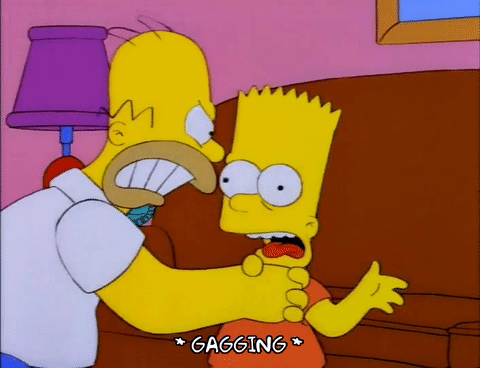

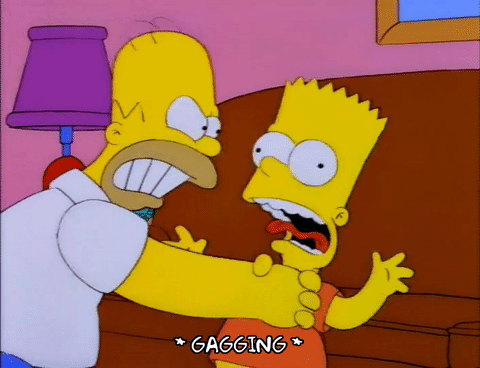

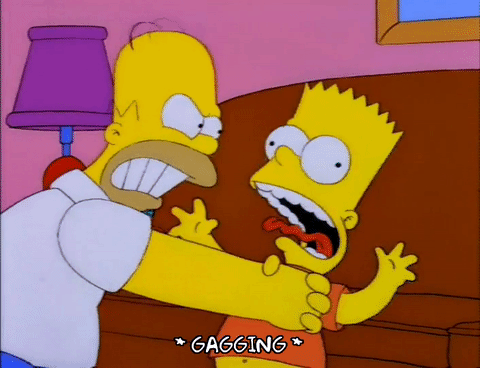

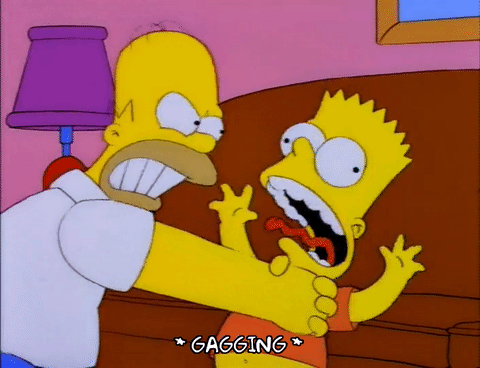

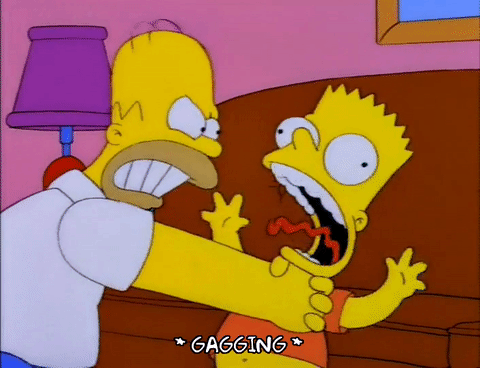

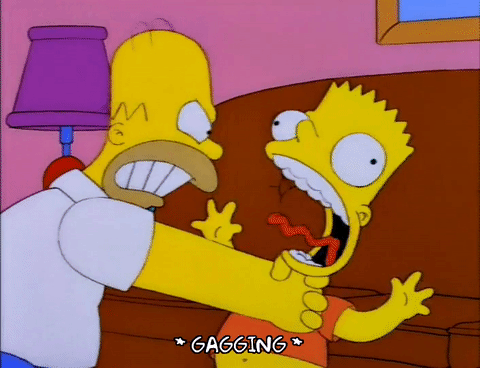

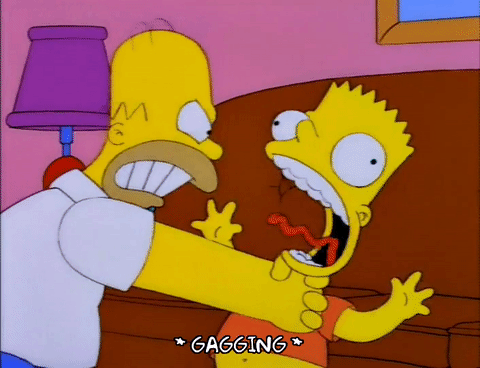

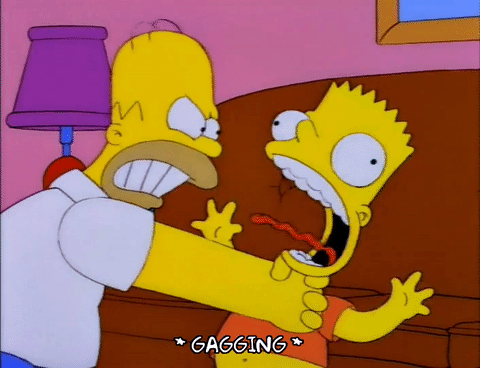

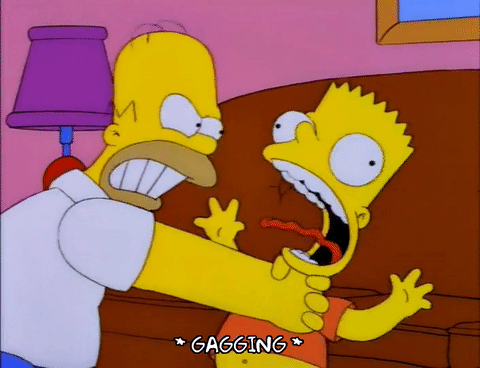

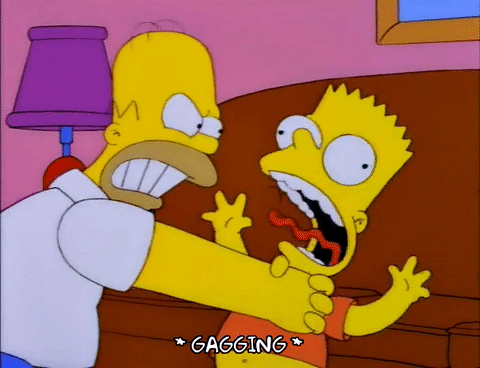

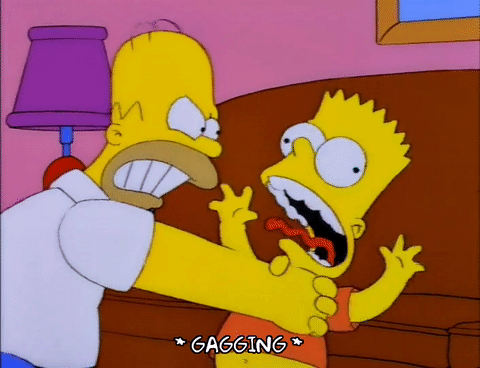

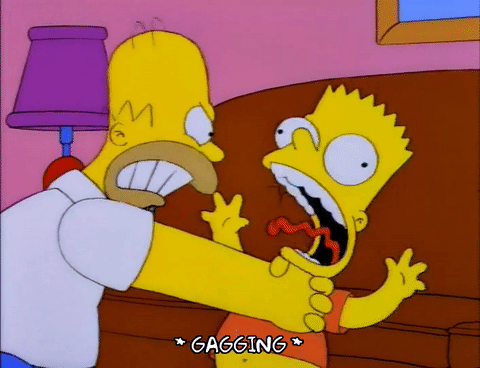

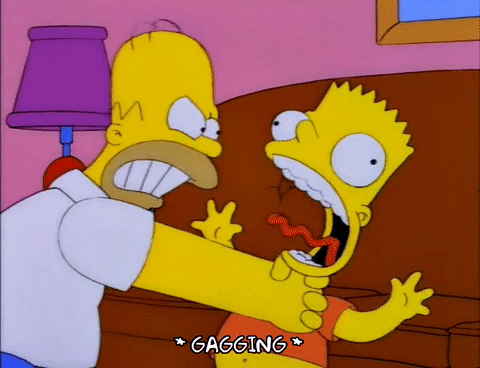

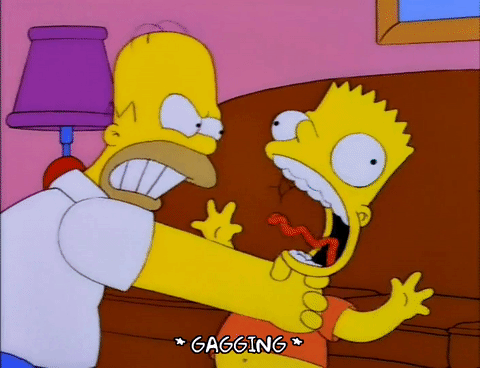

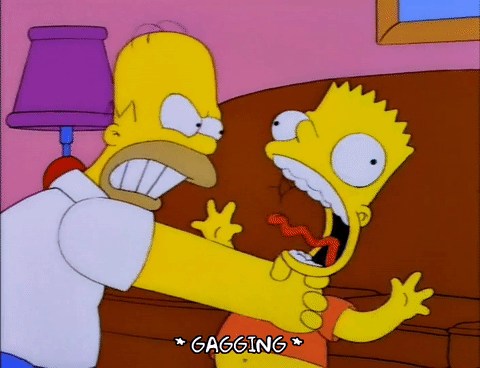

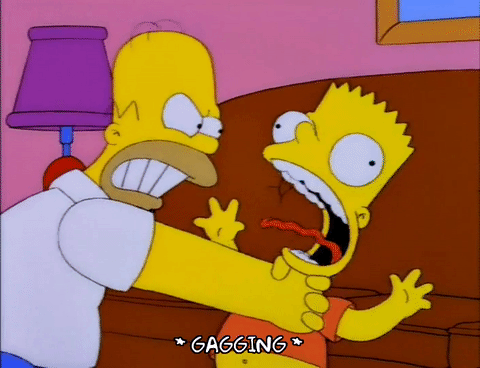

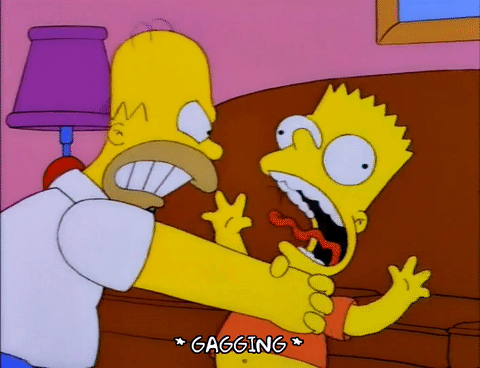

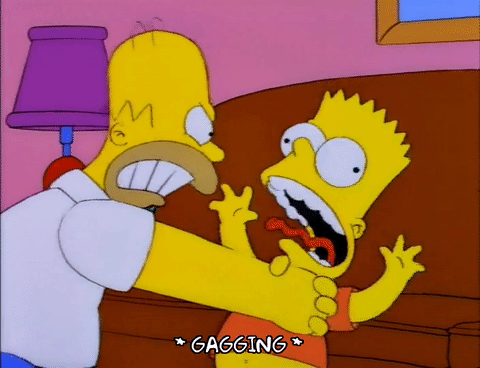

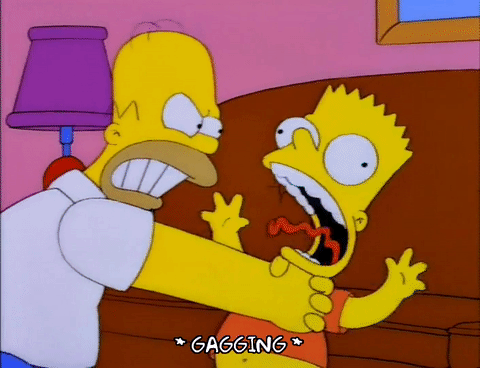

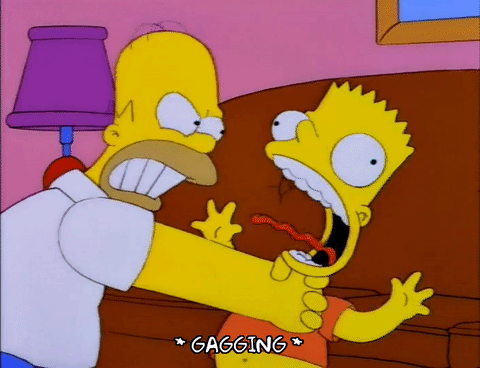

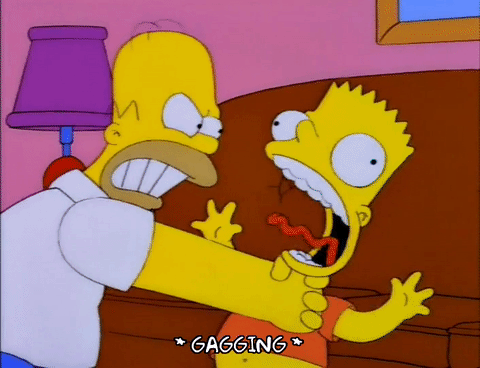

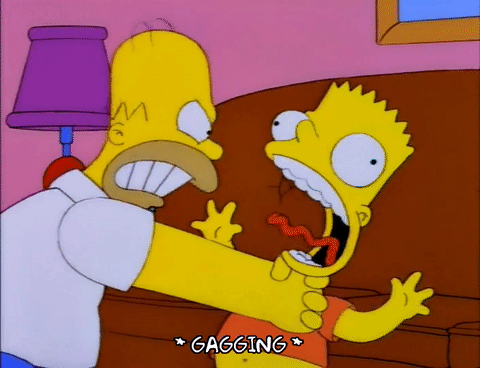

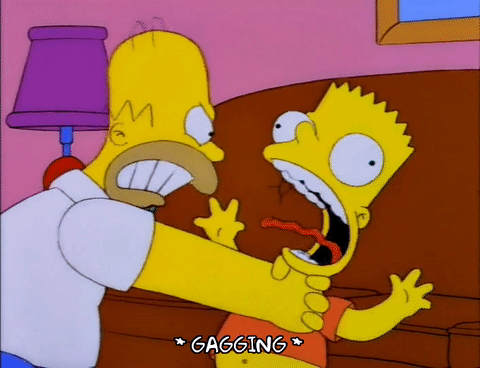

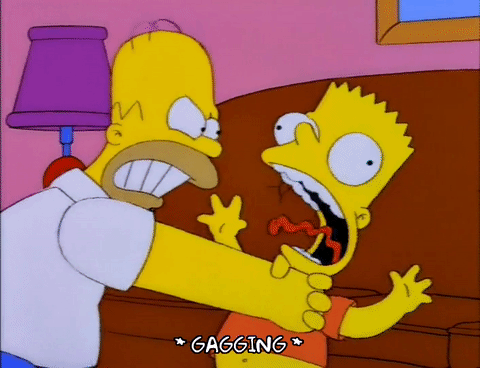

In [41]:
from PIL import Image

im = Image.open("images/bart.gif")
      
try:
    while 1:
        display(im)
        im.seek(im.tell()+1)
except EOFError:
    pass # end of sequence

As seen in this example, you’ll get an `EOFError` exception when the sequence ends.

Note that most drivers in the current version of the library only allow you to seek to the next frame (as in the above example). To rewind the file, you may have to reopen it.

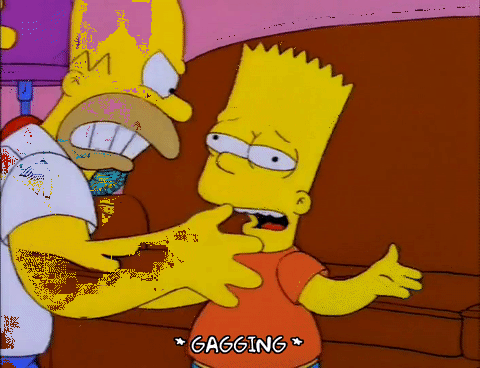

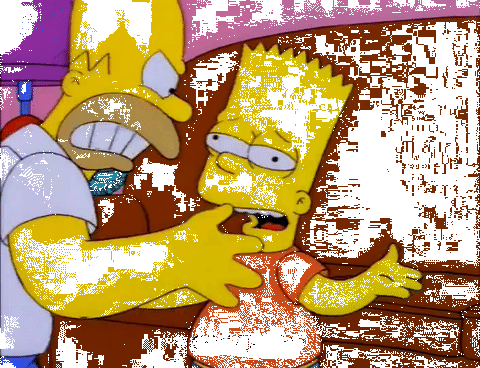

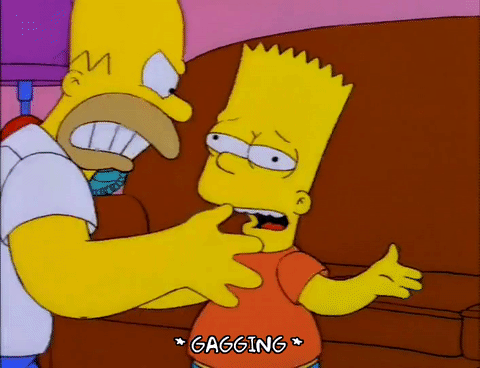

In [98]:
im = Image.open("images/bart.gif")
im.seek(2)
display(im) # corrupted ...
im.seek(0); im.seek(1); im.seek(2)
display(im) # still corrupted ...
im.seek(0); im.load(); im.seek(1); im.load(); im.seek(2); im.load()
display(im) # finally ! We need to completely load every image in the sequence

The following iterator class lets you to use the for-statement to loop over the sequence:

#### A sequence iterator class

In [42]:
class ImageSequence:
    def __init__(self, path):
        self.path = path
    def __getitem__(self, ix):
        im = Image.open(self.path)
        try:
            for i in range(ix+1):
                im.seek(i)
                im.load()
            return im
        except EOFError:
            raise IndexError
    def __len__(self):
        for n, frame in enumerate(sequence):
            pass        
        return n

from ipywidgets import interact, IntSlider
sequence = ImageSequence("images/bart.gif")
slider = IntSlider(min=0, max=len(sequence), value=0)
@interact(index=slider)
def frame(index):
    return sequence[index]


interactive(children=(IntSlider(value=0, description='index', max=33), Output()), _dom_classes=('widget-interact',))

Postscript Printing
---------------------------

The Python Imaging Library includes functions to print images, text and graphics on Postscript printers. 
Here’s a simple example:

#### Drawing Postscript

In [25]:
from PIL import Image, PSDraw

im = Image.open("images/lena.ppm")
title = "lena"
box = (1*72, 2*72, 7*72, 10*72) # in points

output = open("images/lena.ps", "wb")
ps = PSDraw.PSDraw(output) # default is sys.stdout
ps.begin_document(title)

# draw the image (75 dpi)
ps.image(box, im, 75)
ps.rectangle(box)

# draw title
ps.setfont("HelveticaNarrow-Bold", 36)
ps.text((3*72, 4*72), title)

ps.end_document()

More on Reading Images
-------------------------

As described earlier, the open function of the Image module is used to open an image file. 
In most cases, you simply pass it the filename as an argument:

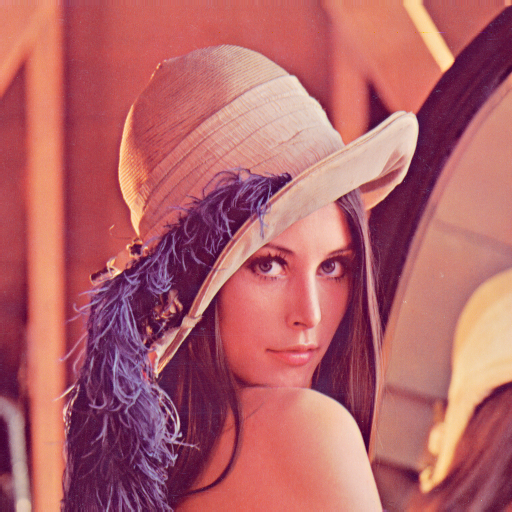

In [26]:
Image.open("images/lena.ppm")

If everything goes well, the result is an Image object. Otherwise, an `IOError` exception is raised.

You can use a file-like object instead of the filename. 
The object must implement read, seek and tell methods, and be opened in binary mode.

#### Reading from an open file

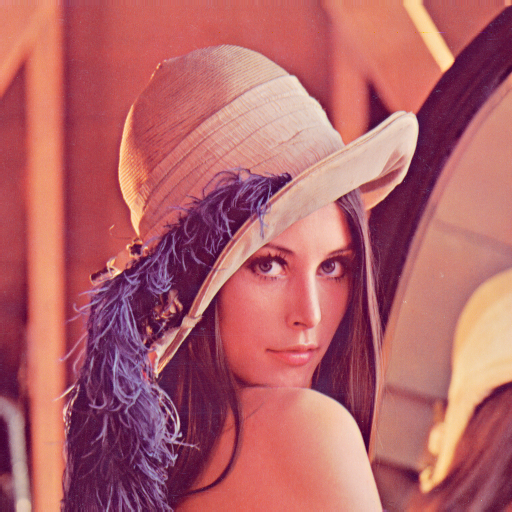

In [27]:
fp = open("images/lena.ppm", "rb")
Image.open(fp)

To read an image from bytes, use the [`io.BytesIO`](https://docs.python.org/2/library/io.html#buffered-streams) class:

#### Reading from bytes

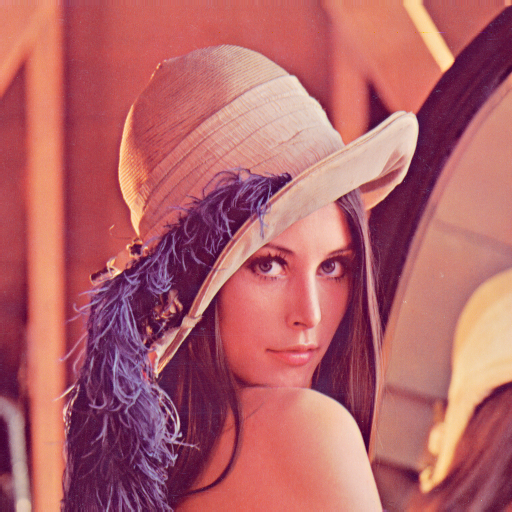

In [28]:
import io

bytes = open("images/lena.ppm", "rb").read()
Image.open(io.BytesIO(bytes))

Note that the library rewinds the file (using `seek(0)`) before reading the image header. 
In addition, seek will also be used when the image data is read (by the load method). 
If the image file is embedded in a larger file, such as a tar file, you can use the 
`ContainerIO` or `TarIO` modules to access it.

#### Reading from a tar archive

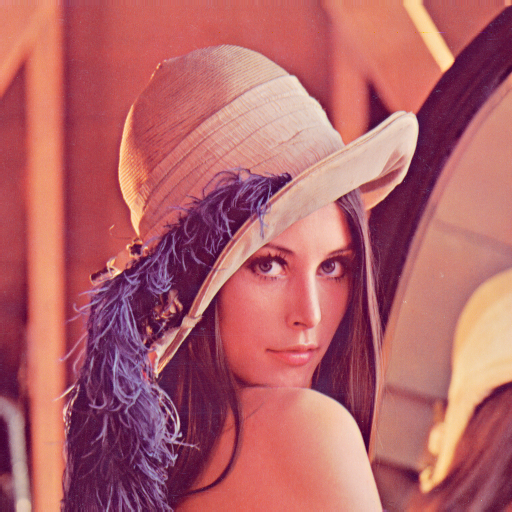

In [29]:
from PIL import TarIO

fp = TarIO.TarIO("images/images.tar", "images/lena.ppm")
Image.open(fp)

Controlling the Decoder
--------------------------

Some decoders allow you to manipulate the image while reading it from a file. This can often be used to speed up decoding when creating thumbnails (when speed is usually more important than quality) and printing to a monochrome laser printer (when only a greyscale version of the image is needed).

The [draft] method manipulates an opened but not yet loaded image so it as closely as possible matches the given mode and size. This is done by reconfiguring the image decoder.

[draft]: http://effbot.org/imagingbook/image.htm#image-draft-method

#### Reading in draft mode

In [30]:
im = Image.open("images/lena.ppm")
print("original =", im.mode, im.size)

im.draft("L", (100, 100))
print("draft =", im.mode, im.size) # Uhu? Should print "draft = L (128, 128)" according to the doc

original = RGB (512, 512)
draft = RGB (512, 512)


This prints something like:

    original = RGB (512, 512)
    draft = L (128, 128)

Note that the resulting image may not exactly match the requested mode and size. 
To make sure that the image is not larger than the given size, use the thumbnail method instead.

-----

Sandbox
--------

In [31]:
from IPython.display import display
from ipywidgets import interact, fixed, HBox

In [72]:

%matplotlib inline
from matplotlib.pyplot import *
rcParams['figure.figsize'] = (15,8)
rcParams['font.size'] = 18

SyntaxError: invalid syntax (<ipython-input-31-9b826e5e29de>, line 4)

In [ ]:
def histogram(im):
    R, G, B = im.split()
    Rh = R.histogram()
    Gh = G.histogram()
    Bh = B.histogram()
    plot(Rh, "r")
    plot(Gh, "g")
    plot(Bh, "b")
    w = im.size[0]
    h = im.size[1]
    ylabel("Pixel count (/{0})".format(w*h))
    xlabel("Intensity [0-255]")
    title("Color Histogram")
    #axis("tight")
    grid(True)
    autoscale(axis="x", tight=True)

**TODO:** use the color picker somehow ?